In [1]:
%load_ext autoreload
%autoreload

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from Models.Helper import split_data

from pmdarima.arima import ADFTest

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler





In [3]:
IBB = Path.cwd() / "data" / "Raw" / "IBB.csv"
IBBmonth = Path.cwd() / "data" /"Raw" / "IBBmonth.csv"

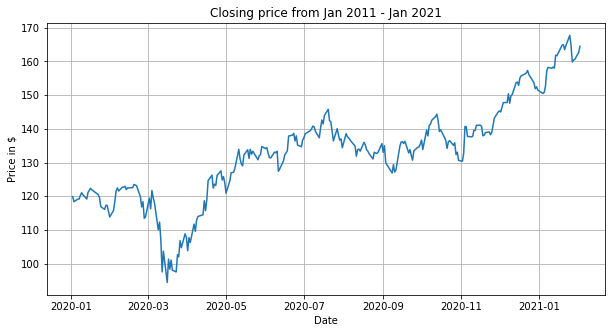

,Close
Date,
2020-01-02,119.889999
2020-01-03,118.360001
2020-01-06,119.120003
2020-01-07,119.150002
2020-01-08,120.220001


In [4]:
def read_data(filename):
    data = pd.read_csv(filename, usecols=[0,4], parse_dates=[0], header=0)
    data_close = pd.DataFrame(data['Close'])
    data_close.index = pd.to_datetime(data['Date'])
    
    plt.figure(figsize=[10, 5]); # Set dimensions for figure
    plt.plot(data['Date'], data['Close'])
    plt.title('Closing price from Jan 2011 - Jan 2021')
    plt.ylabel('Price in $')
    plt.xlabel('Date')
    #plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    return data_close
    
    
data = read_data(IBBmonth)
data.head()

In [5]:
split_ratio, train_data, test_data = split_data(data, 0.67)

Number of training samples: 183
Number of testing samples: 91


In [6]:
#adf_test = ADFTest(alpha=0.05)
#adf_test.should_diff(data['Close'])

In [7]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [8]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [9]:
adf_test(data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.429282
p-value                          0.905094
#Lags Used                       9.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [10]:
kpss_test(data['Close'])

Results of KPSS Test:
Test Statistic            1.959387
p-value                   0.010000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Andu\anaconda3\envs\Tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [11]:
normalized_data = data.copy()
  
# apply normalization techniques
column = 'Close'
normalized_data[column] = MinMaxScaler().fit_transform(np.array(normalized_data[column]).reshape(-1,1))
  
# view normalized data  
display(normalized_data)

,Close
Date,
2020-01-02,0.347601
2020-01-03,0.326745
2020-01-06,0.337105
2020-01-07,0.337514
2020-01-08,0.352099
...,...
2021-01-27,0.892312
2021-01-28,0.899946
2021-01-29,0.903081


In [12]:
standardized_data = data.copy()
 
column = 'Close'
normalized_data[column] = StandardScaler().fit_transform(np.array(normalized_data[column]).reshape(-1,1)) 
display(normalized_data)

,Close
Date,
2020-01-02,-0.885778
2020-01-03,-0.991442
2020-01-06,-0.938955
2020-01-07,-0.936884
2020-01-08,-0.862988
...,...
2021-01-27,1.873932
2021-01-28,1.912606
2021-01-29,1.928490
